In [86]:
%matplotlib inline

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_excel("/Users/kosmas/Desktop/Columbia_Data_Studio_Projects/data-studio-projects/Weekly projects/Fires_in Greece/DasikesPyrkagies2018v1.4.xlsx")
df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΚΑΜΜΕΝΗ ΕΚΤΑΣΗ (Σε Στρέμματα),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,ΠΡΟΣΩΠΙΚΟ,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,ΟΧΗΜΑΤΑ,Unnamed: 24,Unnamed: 25,Unnamed: 26,ΕΝΑΕΡΙΑ,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Υπηρεσία,Νομός,Ημερ/νία Έναρξης,Ώρα Έναρξης,Ημερ/νία Κατασβεσης,Ώρα Κατάσβεσης,Δασαρχείο,Δήμος,Περιοχή,Διεύθυνση,Δάση,Δασική Έκταση,Άλση,Χορτ/κές Εκτάσεις,Καλάμια - Βάλτοι,Γεωργικές Εκτάσεις,Υπολλείματα Καλλιεργειών,Σκουπι-δότοποι,ΠΥΡΟΣ. ΣΩΜΑ,ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ,ΕΘΕΛΟ-ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ. ΟΧΗΜ.,ΟΧΗΜ. ΟΤΑ,ΒΥΤΙΟ- ΦΟΡΑ,ΜΗΧΑΝΗ-ΜΑΤΑ,ΕΛΙΚΟ- ΠΤΕΡΑ,Α/Φ CL415,Α/Φ CL215,Α/Φ PZL,Α/Φ GRU.
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-05-29 00:00:00,12:06,2018-05-29 00:00:00,18:30,NaN,Δ. ΩΡΩΠΟΥ,NaN,ΘΕΣΗ ΚΑΚΩΣΙ - ΒΛΑΣΤΟΣ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-07-23 00:00:00,19:00,2018-07-31 00:00:00,10:18,NaN,Δ. ΩΡΩΠΟΥ,ΚΑΛΑΜΟΣ,ΟΛΥΜΠΙΚΑΣ Κ' ΔΕΞΑΜΕΝΗΣ ΑΝΩ ΠΑΝΟΡΑΜΑ-ΑΓ.ΑΠΟΣΤ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-08-26 00:00:00,15:30,2018-08-27 00:00:00,07:55,NaN,Δ. ΩΡΩΠΟΥ,ΑΦΙΔΝΕΣ,ΑΦΙΔΝΑΙ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-11-07 00:00:00,20:10,2018-11-08 00:00:00,21:10,NaN,Δ. ΩΡΩΠΟΥ,ΚΑΛΑΜΟΣ,ΘΕΣΗ ΑΓΙΑ ΤΡΙΑΔΑ-ΟΔΟΣ ΑΓΙΑΣ ΤΡΙΑΔΑΣ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-05-23 00:00:00,17:36,2018-05-23 00:00:00,18:10,ΠΕΝΤΕΛΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,NaN,ΤΕΡΜΑ ΟΔΟΥ ΚΑΡΑΜΟΛΕΓΚΟΥ (ΕΝΑΝΤΙ ΠΥΡΟΦΥΛΑΚΕΙΟΥ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0
6,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-03-13 00:00:00,10:51,2018-03-13 00:00:00,13:40,NaN,Δ. ΩΡΩΠΟΥ,ΑΦΙΔΝΕΣ,ΛΑΚΚΕΣ ΔΡΟΣΟΠΗΓΗΣ,0,0.2,0,0,0,0,0,0,13,0,21,0,14,4,0,1,0,0,0,0,0,0
7,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-04-11 00:00:00,16:21,2018-04-11 00:00:00,17:15,ΠΑΡΝΗΘΑΣ,Δ. ΔΙΟΝΥΣΟΥ,ΚΡΥΟΝΕΡΙ,ΚΡΥΟΝΕΡΙ,0,0.8,0,0,0,0,0,0,10,0,12,0,0,3,0,0,0,0,0,0,0,0
8,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-07-25 00:00:00,15:50,2018-07-25 00:00:00,20:15,NaN,Δ. ΑΧΑΡΝΩΝ,ΘΡΑΚΟΜΑΚΕΔΟΝΕΣ,ΘΡΑΚΟΜΑΚΕΔΟΝΕΣ,0.5,0,0,0,0,0,0,0,9,0,0,0,0,3,0,0,0,0,0,0,0,0
9,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-09-01 00:00:00,22:29,2018-09-02 00:00:00,00:00,NaN,Δ. ΑΧΑΡΝΩΝ,ΑΧΑΡΝΑΙ,ΠΕΡΙΟΧΗ ΚΕΡΑΜΥΔΙΟΥ - ΠΑΡΝΗΘΑ,0,0.5,0,0,0,0,0,0,18,0,0,0,0,7,0,0,0,0,0,0,0,0


In [89]:
pd.set_option('display.max_columns', None)

In [90]:
df.dtypes

Unnamed: 0                       object
Unnamed: 1                       object
Unnamed: 2                       object
Unnamed: 3                       object
Unnamed: 4                       object
Unnamed: 5                       object
Unnamed: 6                       object
Unnamed: 7                       object
Unnamed: 8                       object
Unnamed: 9                       object
ΚΑΜΜΕΝΗ ΕΚΤΑΣΗ (Σε Στρέμματα)    object
Unnamed: 11                      object
Unnamed: 12                      object
Unnamed: 13                      object
Unnamed: 14                      object
Unnamed: 15                      object
Unnamed: 16                      object
Unnamed: 17                      object
ΠΡΟΣΩΠΙΚΟ                        object
Unnamed: 19                      object
Unnamed: 20                      object
Unnamed: 21                      object
Unnamed: 22                      object
ΟΧΗΜΑΤΑ                          object
Unnamed: 24                      object


In [91]:
df.shape

(8007, 32)

In [92]:
df = df.rename(index=str, columns={'Unnamed: 2': 'Ημερνία_Εναρξης',
                                   'Unnamed: 4': 'Ημερνια_Κατασβεσης',
                                   'Unnamed: 0': 'Υρεσια',
                                   'Unnamed: 1': 'Νομός',
                                   'Unnamed: 3': 'ωρα_Έναρξης',
                                   'Unnamed: 5': 'ωρα_Κατάσβεσης',
                                   'ΚΑΜΜΕΝΗ ΕΚΤΑΣΗ (Σε Στρέμματα)': 'Καμμένες_Εκτάσεις',
                                   'Unnamed: 11': 'Δασική_Έκταση', 
                                   'Unnamed: 12': 'Άλση', 
                                   'Unnamed: 13': 'Χορτκές_Εκτάσεις',
                                   'Unnamed: 14': 'Καλάμια_Βάλτοι', 
                                   'Unnamed: 15': 'Γεωργικές_Εκτάσεις', 
                                   'Unnamed: 16': 'Υπολλείματα_Καλλιεργειών', 
                                   'Unnamed: 17': 'Σκουπιδότοποι',
                                   'ΠΡΟΣΩΠΙΚΟ': 'ΠΥΡΟΣ_ΣΩΜΑ',
                                   'Unnamed: 19': 'ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ',
                                   'Unnamed: 20': 'ΕΘΕΛΟ_ΝΤΕΣ',
                                   'Unnamed: 21': 'ΣΤΡΑΤΟΣ',
                                   'Unnamed: 22': 'ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ',
                                   'ΟΧΗΜΑΤΑ': 'ΠΥΡΟΣ_ΟΧΗΜ',
                                   'Unnamed: 24': 'ΟΧΗΜ_ΟΤΑ',
                                   'Unnamed: 25': 'ΒΥΤΙΟ_ΦΟΡΑ',
                                   'Unnamed: 26': 'ΜΗΧΑΝΗ_ΜΑΤΑ',
                                   'ΕΝΑΕΡΙΑ': 'ΕΛΙΚΟ_ΠΤΕΡΑ',
                                   'Unnamed: 28': 'Α_Φ_CL415',
                                   'Unnamed: 29': 'Α_Φ_CL215',
                                   'Unnamed: 30': 'Α_Φ_PZL',
                                   'Unnamed: 31': 'Α_Φ_GRU'})
df.head()

,Υρεσια,Νομός,Ημερνία_Εναρξης,ωρα_Έναρξης,Ημερνια_Κατασβεσης,ωρα_Κατάσβεσης,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU
0,Υπηρεσία,Νομός,Ημερ/νία Έναρξης,Ώρα Έναρξης,Ημερ/νία Κατασβεσης,Ώρα Κατάσβεσης,Δασαρχείο,Δήμος,Περιοχή,Διεύθυνση,Δάση,Δασική Έκταση,Άλση,Χορτ/κές Εκτάσεις,Καλάμια - Βάλτοι,Γεωργικές Εκτάσεις,Υπολλείματα Καλλιεργειών,Σκουπι-δότοποι,ΠΥΡΟΣ. ΣΩΜΑ,ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ,ΕΘΕΛΟ-ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ. ΟΧΗΜ.,ΟΧΗΜ. ΟΤΑ,ΒΥΤΙΟ- ΦΟΡΑ,ΜΗΧΑΝΗ-ΜΑΤΑ,ΕΛΙΚΟ- ΠΤΕΡΑ,Α/Φ CL415,Α/Φ CL215,Α/Φ PZL,Α/Φ GRU.
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-05-29 00:00:00,12:06,2018-05-29 00:00:00,18:30,NaN,Δ. ΩΡΩΠΟΥ,NaN,ΘΕΣΗ ΚΑΚΩΣΙ - ΒΛΑΣΤΟΣ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-07-23 00:00:00,19:00,2018-07-31 00:00:00,10:18,NaN,Δ. ΩΡΩΠΟΥ,ΚΑΛΑΜΟΣ,ΟΛΥΜΠΙΚΑΣ Κ' ΔΕΞΑΜΕΝΗΣ ΑΝΩ ΠΑΝΟΡΑΜΑ-ΑΓ.ΑΠΟΣΤ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-08-26 00:00:00,15:30,2018-08-27 00:00:00,07:55,NaN,Δ. ΩΡΩΠΟΥ,ΑΦΙΔΝΕΣ,ΑΦΙΔΝΑΙ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-11-07 00:00:00,20:10,2018-11-08 00:00:00,21:10,NaN,Δ. ΩΡΩΠΟΥ,ΚΑΛΑΜΟΣ,ΘΕΣΗ ΑΓΙΑ ΤΡΙΑΔΑ-ΟΔΟΣ ΑΓΙΑΣ ΤΡΙΑΔΑΣ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0


In [93]:
df.dtypes

Υρεσια                      object
Νομός                       object
Ημερνία_Εναρξης             object
ωρα_Έναρξης                 object
Ημερνια_Κατασβεσης          object
ωρα_Κατάσβεσης              object
Unnamed: 6                  object
Unnamed: 7                  object
Unnamed: 8                  object
Unnamed: 9                  object
Καμμένες_Εκτάσεις           object
Δασική_Έκταση               object
Άλση                        object
Χορτκές_Εκτάσεις            object
Καλάμια_Βάλτοι              object
Γεωργικές_Εκτάσεις          object
Υπολλείματα_Καλλιεργειών    object
Σκουπιδότοποι               object
ΠΥΡΟΣ_ΣΩΜΑ                  object
ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ            object
ΕΘΕΛΟ_ΝΤΕΣ                  object
ΣΤΡΑΤΟΣ                     object
ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ              object
ΠΥΡΟΣ_ΟΧΗΜ                  object
ΟΧΗΜ_ΟΤΑ                    object
ΒΥΤΙΟ_ΦΟΡΑ                  object
ΜΗΧΑΝΗ_ΜΑΤΑ                 object
ΕΛΙΚΟ_ΠΤΕΡΑ                 object
Α_Φ_CL415           

In [94]:
df = df.drop(['0'])

In [95]:
df.head()

,Υρεσια,Νομός,Ημερνία_Εναρξης,ωρα_Έναρξης,Ημερνια_Κατασβεσης,ωρα_Κατάσβεσης,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-05-29 00:00:00,12:06,2018-05-29 00:00:00,18:30,NaN,Δ. ΩΡΩΠΟΥ,NaN,ΘΕΣΗ ΚΑΚΩΣΙ - ΒΛΑΣΤΟΣ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-07-23 00:00:00,19:00,2018-07-31 00:00:00,10:18,NaN,Δ. ΩΡΩΠΟΥ,ΚΑΛΑΜΟΣ,ΟΛΥΜΠΙΚΑΣ Κ' ΔΕΞΑΜΕΝΗΣ ΑΝΩ ΠΑΝΟΡΑΜΑ-ΑΓ.ΑΠΟΣΤ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-08-26 00:00:00,15:30,2018-08-27 00:00:00,07:55,NaN,Δ. ΩΡΩΠΟΥ,ΑΦΙΔΝΕΣ,ΑΦΙΔΝΑΙ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-11-07 00:00:00,20:10,2018-11-08 00:00:00,21:10,NaN,Δ. ΩΡΩΠΟΥ,ΚΑΛΑΜΟΣ,ΘΕΣΗ ΑΓΙΑ ΤΡΙΑΔΑ-ΟΔΟΣ ΑΓΙΑΣ ΤΡΙΑΔΑΣ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-05-23 00:00:00,17:36,2018-05-23 00:00:00,18:10,ΠΕΝΤΕΛΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,NaN,ΤΕΡΜΑ ΟΔΟΥ ΚΑΡΑΜΟΛΕΓΚΟΥ (ΕΝΑΝΤΙ ΠΥΡΟΦΥΛΑΚΕΙΟΥ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0


In [96]:
df.shape

(8006, 32)

In [97]:
df = df.drop(columns=['Unnamed: 6','Unnamed: 8', 'Unnamed: 9'])

In [98]:
df.head()

,Υρεσια,Νομός,Ημερνία_Εναρξης,ωρα_Έναρξης,Ημερνια_Κατασβεσης,ωρα_Κατάσβεσης,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-05-29 00:00:00,12:06,2018-05-29 00:00:00,18:30,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-07-23 00:00:00,19:00,2018-07-31 00:00:00,10:18,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-08-26 00:00:00,15:30,2018-08-27 00:00:00,07:55,Δ. ΩΡΩΠΟΥ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-11-07 00:00:00,20:10,2018-11-08 00:00:00,21:10,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-05-23 00:00:00,17:36,2018-05-23 00:00:00,18:10,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0


In [99]:
df.shape

(8006, 29)

In [100]:
df = df.dropna()

In [101]:
df.shape

(6691, 29)

In [102]:
df['start_daytime'] = df['Ημερνία_Εναρξης'].map(str) + df['ωρα_Έναρξης']
df['end_daytime'] = df['Ημερνια_Κατασβεσης'].map(str) + df['ωρα_Κατάσβεσης']

In [103]:
df.head()

,Υρεσια,Νομός,Ημερνία_Εναρξης,ωρα_Έναρξης,Ημερνια_Κατασβεσης,ωρα_Κατάσβεσης,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU,start_daytime,end_daytime
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-05-29 00:00:00,12:06,2018-05-29 00:00:00,18:30,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 00:00:0012:06,2018-05-29 00:00:0018:30
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-07-23 00:00:00,19:00,2018-07-31 00:00:00,10:18,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 00:00:0019:00,2018-07-31 00:00:0010:18
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-08-26 00:00:00,15:30,2018-08-27 00:00:00,07:55,Δ. ΩΡΩΠΟΥ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 00:00:0015:30,2018-08-27 00:00:0007:55
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-11-07 00:00:00,20:10,2018-11-08 00:00:00,21:10,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 00:00:0020:10,2018-11-08 00:00:0021:10
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-05-23 00:00:00,17:36,2018-05-23 00:00:00,18:10,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 00:00:0017:36,2018-05-23 00:00:0018:10


In [104]:
df['start_daytime'] = df['start_daytime'].str.replace('00:00:00', '')
df['end_daytime'] = df['end_daytime'].str.replace('00:00:00', '')


In [105]:
df.head()

,Υρεσια,Νομός,Ημερνία_Εναρξης,ωρα_Έναρξης,Ημερνια_Κατασβεσης,ωρα_Κατάσβεσης,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU,start_daytime,end_daytime
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-05-29 00:00:00,12:06,2018-05-29 00:00:00,18:30,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06,2018-05-29 18:30
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-07-23 00:00:00,19:00,2018-07-31 00:00:00,10:18,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00,2018-07-31 10:18
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-08-26 00:00:00,15:30,2018-08-27 00:00:00,07:55,Δ. ΩΡΩΠΟΥ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30,2018-08-27 07:55
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-11-07 00:00:00,20:10,2018-11-08 00:00:00,21:10,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10,2018-11-08 21:10
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-05-23 00:00:00,17:36,2018-05-23 00:00:00,18:10,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36,2018-05-23 18:10


In [106]:
df = df.drop(columns=['Ημερνία_Εναρξης','ωρα_Έναρξης', 'Ημερνια_Κατασβεσης', 'ωρα_Κατάσβεσης'])
df.head()

,Υρεσια,Νομός,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU,start_daytime,end_daytime
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06,2018-05-29 18:30
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00,2018-07-31 10:18
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30,2018-08-27 07:55
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10,2018-11-08 21:10
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36,2018-05-23 18:10


In [107]:
df['start_daytime'] = pd.to_datetime(df['start_daytime'])
df['end_daytime'] = pd.to_datetime(df['end_daytime'])



In [108]:
df['Καμμένες_Εκτάσεις'] = df['Καμμένες_Εκτάσεις'].astype(int)
df['Δασική_Έκταση'] = df['Δασική_Έκταση'].astype(int)
df['Άλση'] = df['Άλση'].astype(int)
df['Χορτκές_Εκτάσεις'] = df['Χορτκές_Εκτάσεις'].astype(int)
df['Καλάμια_Βάλτοι'] = df['Καλάμια_Βάλτοι'].astype(int)
df['Γεωργικές_Εκτάσεις'] = df['Γεωργικές_Εκτάσεις'].astype(int)
df['Υπολλείματα_Καλλιεργειών'] = df['Υπολλείματα_Καλλιεργειών'].astype(int)
df['Σκουπιδότοποι'] = df['Σκουπιδότοποι'].astype(int)
df['ΠΥΡΟΣ_ΣΩΜΑ'] = df['ΠΥΡΟΣ_ΣΩΜΑ'].astype(int)
df['ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ'] = df['ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ'].astype(int)
df['ΕΘΕΛΟ_ΝΤΕΣ'] = df['ΕΘΕΛΟ_ΝΤΕΣ'].astype(int)
df['ΣΤΡΑΤΟΣ'] = df['ΣΤΡΑΤΟΣ'].astype(int)
df['ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ'] = df['ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ'].astype(int)
df['ΠΥΡΟΣ_ΟΧΗΜ'] = df['ΠΥΡΟΣ_ΟΧΗΜ'].astype(int)
df['ΟΧΗΜ_ΟΤΑ'] = df['ΟΧΗΜ_ΟΤΑ'].astype(int)
df['ΒΥΤΙΟ_ΦΟΡΑ'] = df['ΒΥΤΙΟ_ΦΟΡΑ'].astype(int)
df['ΜΗΧΑΝΗ_ΜΑΤΑ'] = df['ΜΗΧΑΝΗ_ΜΑΤΑ'].astype(int)
df['ΕΛΙΚΟ_ΠΤΕΡΑ'] = df['ΕΛΙΚΟ_ΠΤΕΡΑ'].astype(int)
df['ΜΗΧΑΝΗ_ΜΑΤΑ'] = df['ΜΗΧΑΝΗ_ΜΑΤΑ'].astype(int)
df['Α_Φ_CL415'] = df['Α_Φ_CL415'].astype(int)
df['Α_Φ_CL215'] = df['Α_Φ_CL215'].astype(int)
df['Α_Φ_PZL'] = df['Α_Φ_PZL'].astype(int)
df['Α_Φ_GRU'] = df['Α_Φ_GRU'].astype(int)       

In [109]:
df.dtypes

Υρεσια                              object
Νομός                               object
Unnamed: 7                          object
Καμμένες_Εκτάσεις                    int64
Δασική_Έκταση                        int64
Άλση                                 int64
Χορτκές_Εκτάσεις                     int64
Καλάμια_Βάλτοι                       int64
Γεωργικές_Εκτάσεις                   int64
Υπολλείματα_Καλλιεργειών             int64
Σκουπιδότοποι                        int64
ΠΥΡΟΣ_ΣΩΜΑ                           int64
ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ                     int64
ΕΘΕΛΟ_ΝΤΕΣ                           int64
ΣΤΡΑΤΟΣ                              int64
ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ                       int64
ΠΥΡΟΣ_ΟΧΗΜ                           int64
ΟΧΗΜ_ΟΤΑ                             int64
ΒΥΤΙΟ_ΦΟΡΑ                           int64
ΜΗΧΑΝΗ_ΜΑΤΑ                          int64
ΕΛΙΚΟ_ΠΤΕΡΑ                          int64
Α_Φ_CL415                            int64
Α_Φ_CL215                            int64
Α_Φ_PZL    

In [110]:
df['difference'] = df.end_daytime - df.start_daytime
df.head()

,Υρεσια,Νομός,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU,start_daytime,end_daytime,difference
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06:00,2018-05-29 18:30:00,0 days 06:24:00
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00:00,2018-07-31 10:18:00,7 days 15:18:00
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30:00,2018-08-27 07:55:00,0 days 16:25:00
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10:00,2018-11-08 21:10:00,1 days 01:00:00
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36:00,2018-05-23 18:10:00,0 days 00:34:00


In [111]:
df['wait_days'] = df['difference'].dt.components['days'] + \
                  df['difference'].dt.components['hours'] / 24
df.head()

,Υρεσια,Νομός,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU,start_daytime,end_daytime,difference,wait_days
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06:00,2018-05-29 18:30:00,0 days 06:24:00,0.250000
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00:00,2018-07-31 10:18:00,7 days 15:18:00,7.625000
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30:00,2018-08-27 07:55:00,0 days 16:25:00,0.666667
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10:00,2018-11-08 21:10:00,1 days 01:00:00,1.041667
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36:00,2018-05-23 18:10:00,0 days 00:34:00,0.000000


In [112]:
df['total_burned_acres'] = df.apply(lambda row: row.Καμμένες_Εκτάσεις +
                                 row.Δασική_Έκταση + 
                                 row.Άλση + 
                                 row.Χορτκές_Εκτάσεις + 
                                 row.Καλάμια_Βάλτοι + 
                                 row.Γεωργικές_Εκτάσεις + 
                                 row.Υπολλείματα_Καλλιεργειών + 
                                 row.Σκουπιδότοποι, axis=1)

In [113]:
df.head()

,Υρεσια,Νομός,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU,start_daytime,end_daytime,difference,wait_days,total_burned_acres
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06:00,2018-05-29 18:30:00,0 days 06:24:00,0.250000,3
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00:00,2018-07-31 10:18:00,7 days 15:18:00,7.625000,650
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30:00,2018-08-27 07:55:00,0 days 16:25:00,0.666667,0
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10:00,2018-11-08 21:10:00,1 days 01:00:00,1.041667,1
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36:00,2018-05-23 18:10:00,0 days 00:34:00,0.000000,10


In [114]:
df.shape

(6691, 30)

In [115]:
df = df.rename(index=str, columns={'Υρεσια': 'Fire_department',
                                   'Νομός': 'region',
                                   'Unnamed: 7': 'borough',
                                   'Καμμένες_Εκτάσεις':'burned_forests1',
                                   'Δασική_Έκταση':'burned_forests2', 
                                   'Άλση':'burned_forests3', 
                                   'Χορτκές_Εκτάσεις':'burned_fields',
                                   'Καλάμια_Βάλτοι':'burned_swamp', 
                                   'Γεωργικές_Εκτάσεις':'burned_Agricultural', 
                                   'Υπολλείματα_Καλλιεργειών':'burned_Agricultural2', 
                                   'Σκουπιδότοποι':'burned_garbage_disposal_sites',
                                   'ΠΥΡΟΣ_ΣΩΜΑ':'firefighters',
                                   'ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ':'firefighters2',
                                   'ΕΘΕΛΟ_ΝΤΕΣ':'volunt_firefighters',
                                   'ΣΤΡΑΤΟΣ':'military_forces',
                                   'ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ':'other_forces',
                                   'ΠΥΡΟΣ_ΟΧΗΜ':'Fire_trucks',
                                   'ΟΧΗΜ_ΟΤΑ':'other_fire_vehicles',
                                   'ΒΥΤΙΟ_ΦΟΡΑ':'fire_tankers',
                                   'ΜΗΧΑΝΗ_ΜΑΤΑ':'fire_equipent',
                                   'ΕΛΙΚΟ_ΠΤΕΡΑ':'helicopters',
                                   'Α_Φ_CL415':'fire_plane_type1',
                                   'Α_Φ_CL215':'fire_plane_type2',
                                   'Α_Φ_PZL':'fire_plane_type3',
                                   'Α_Φ_GRU':'fire_plane_type4'})
df.head()

,Fire_department,region,borough,burned_forests1,burned_forests2,burned_forests3,burned_fields,burned_swamp,burned_Agricultural,burned_Agricultural2,burned_garbage_disposal_sites,firefighters,firefighters2,volunt_firefighters,military_forces,other_forces,Fire_trucks,other_fire_vehicles,fire_tankers,fire_equipent,helicopters,fire_plane_type1,fire_plane_type2,fire_plane_type3,fire_plane_type4,start_daytime,end_daytime,difference,wait_days,total_burned_acres
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06:00,2018-05-29 18:30:00,0 days 06:24:00,0.250000,3
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00:00,2018-07-31 10:18:00,7 days 15:18:00,7.625000,650
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30:00,2018-08-27 07:55:00,0 days 16:25:00,0.666667,0
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10:00,2018-11-08 21:10:00,1 days 01:00:00,1.041667,1
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36:00,2018-05-23 18:10:00,0 days 00:34:00,0.000000,10


In [116]:
df.shape

(6691, 30)

In [117]:
df['total_firefight_personnel'] = df.apply(lambda row: row.firefighters + row.firefighters2 + row.volunt_firefighters + row.military_forces + row.other_forces , axis=1)
df['total_terrestrial_forces'] = df.apply(lambda row: row.Fire_trucks + row.other_fire_vehicles + row.fire_tankers + row.fire_equipent, axis=1)
df['total_aerial_forces'] = df.apply(lambda row: row.helicopters + row.fire_plane_type1 + row.fire_plane_type2 + row.fire_plane_type3 + row.fire_plane_type4, axis=1)


In [118]:
df.head()

,Fire_department,region,borough,burned_forests1,burned_forests2,burned_forests3,burned_fields,burned_swamp,burned_Agricultural,burned_Agricultural2,burned_garbage_disposal_sites,firefighters,firefighters2,volunt_firefighters,military_forces,other_forces,Fire_trucks,other_fire_vehicles,fire_tankers,fire_equipent,helicopters,fire_plane_type1,fire_plane_type2,fire_plane_type3,fire_plane_type4,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06:00,2018-05-29 18:30:00,0 days 06:24:00,0.250000,3,8,2,0
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00:00,2018-07-31 10:18:00,7 days 15:18:00,7.625000,650,69,24,1
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30:00,2018-08-27 07:55:00,0 days 16:25:00,0.666667,0,42,4,1
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10:00,2018-11-08 21:10:00,1 days 01:00:00,1.041667,1,23,12,0
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36:00,2018-05-23 18:10:00,0 days 00:34:00,0.000000,10,23,9,0


In [119]:
df.shape

(6691, 33)

In [120]:
df = df.drop(columns=['burned_forests1',
                      'burned_forests2', 
                      'burned_forests3', 
                      'burned_fields',
                      'burned_swamp',
                      'burned_Agricultural',
                      'burned_Agricultural2',
                      'burned_garbage_disposal_sites',
                      'firefighters',
                      'firefighters2',
                      'volunt_firefighters',
                      'military_forces',
                      'other_forces', 
                      'Fire_trucks',
                      'other_fire_vehicles',
                      'fire_tankers',
                      'fire_equipent',
                      'helicopters',
                      'fire_plane_type1', 
                      'fire_plane_type2',
                      'fire_plane_type3',
                      'fire_plane_type4'])

In [121]:
df.to_csv('data_fire_final.csv')

## This is my final dataframe

In [122]:
df.head()

,Fire_department,region,borough,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,2018-05-29 12:06:00,2018-05-29 18:30:00,0 days 06:24:00,0.250000,3,8,2,0
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,2018-07-23 19:00:00,2018-07-31 10:18:00,7 days 15:18:00,7.625000,650,69,24,1
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,2018-08-26 15:30:00,2018-08-27 07:55:00,0 days 16:25:00,0.666667,0,42,4,1
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,2018-11-07 20:10:00,2018-11-08 21:10:00,1 days 01:00:00,1.041667,1,23,12,0
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,2018-05-23 17:36:00,2018-05-23 18:10:00,0 days 00:34:00,0.000000,10,23,9,0


## Total number of fire incidents per region

In [123]:
df.region.value_counts()

ΛΑΡΙΣΑΣ             519
ΜΕΣΣΗΝΙΑΣ           450
ΗΛΕΙΑΣ              425
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ    293
ΑΧΑΙΑΣ              264
ΚΙΛΚΙΣ              260
ΡΟΔΟΠΗΣ             249
ΚΑΡΔΙΤΣΑΣ           217
ΠΕΛΛΑΣ              211
ΗΡΑΚΛΕΙΟΥ           211
ΘΕΣΣΑΛΟΝΙΚΗΣ        198
ΕΥΒΟΙΑΣ             195
ΕΒΡΟΥ               180
ΚΕΡΚΥΡΑΣ            170
ΚΑΒΑΛΑΣ             160
ΚΕΦΑΛΛΟΝΙΑΣ         140
ΛΑΚΩΝΙΑΣ            137
ΠΙΕΡΙΑΣ             130
ΗΜΑΘΙΑΣ             128
ΑΤΤΙΚΗΣ             122
ΑΡΤΑΣ               117
ΞΑΝΘΗΣ              115
ΑΡΚΑΔΙΑΣ            113
ΡΕΘΥΜΝΟΥ            109
ΔΡΑΜΑΣ              105
ΒΟΙΩΤΙΑΣ            102
ΦΘΙΩΤΙΔΑΣ            99
ΛΕΣΒΟΥ               94
ΜΑΓΝΗΣΙΑΣ            93
ΚΥΚΛΑΔΩΝ             92
ΣΑΜΟΥ                84
ΤΡΙΚΑΛΩΝ             82
ΚΟΖΑΝΗΣ              74
ΘΕΣΠΡΩΤΙΑΣ           73
ΚΟΡΙΝΘΙΑΣ            71
ΣΕΡΡΩΝ               70
ΙΩΑΝΝΙΝΩΝ            69
ΔΩΔΕΚΑΝΗΣΩΝ          64
ΧΑΝΙΩΝ               59
ΖΑΚΥΝΘΟΥ             58
ΚΑΣΤΟΡΙΑΣ            56
ΠΡΕΒΕΖΗΣ        

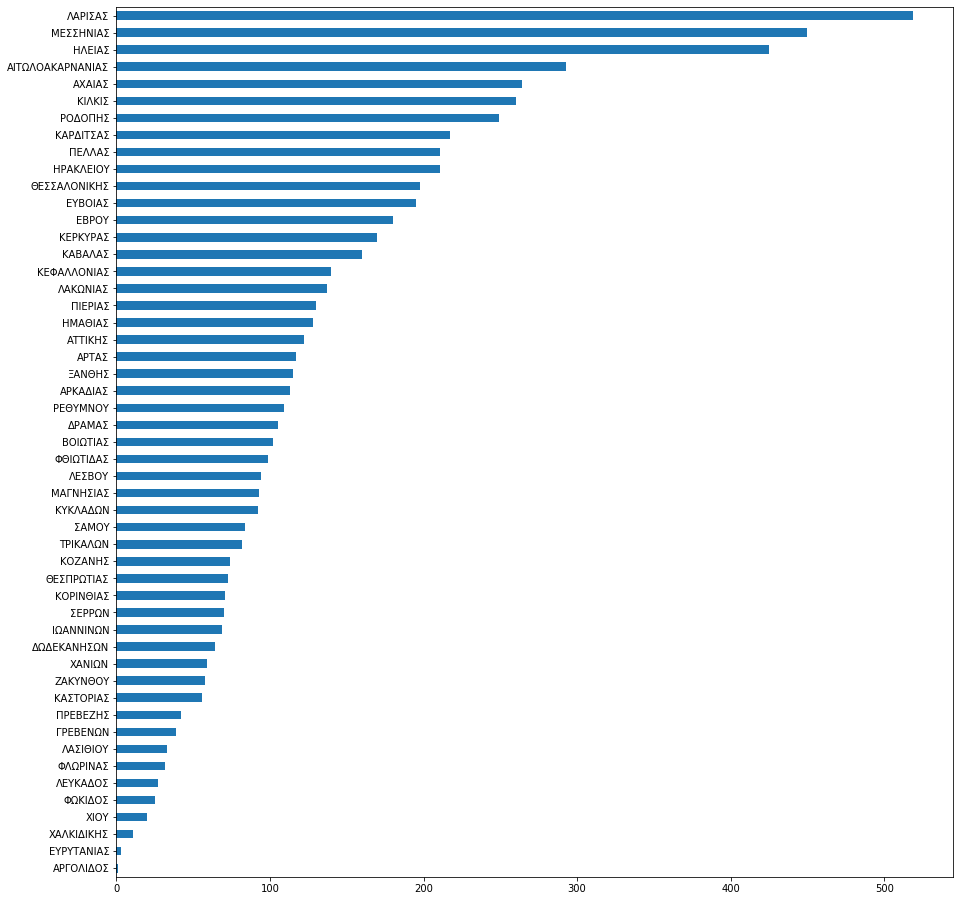

In [124]:
df.region.value_counts().iloc[::-1].plot(kind='barh',figsize=(15,16))

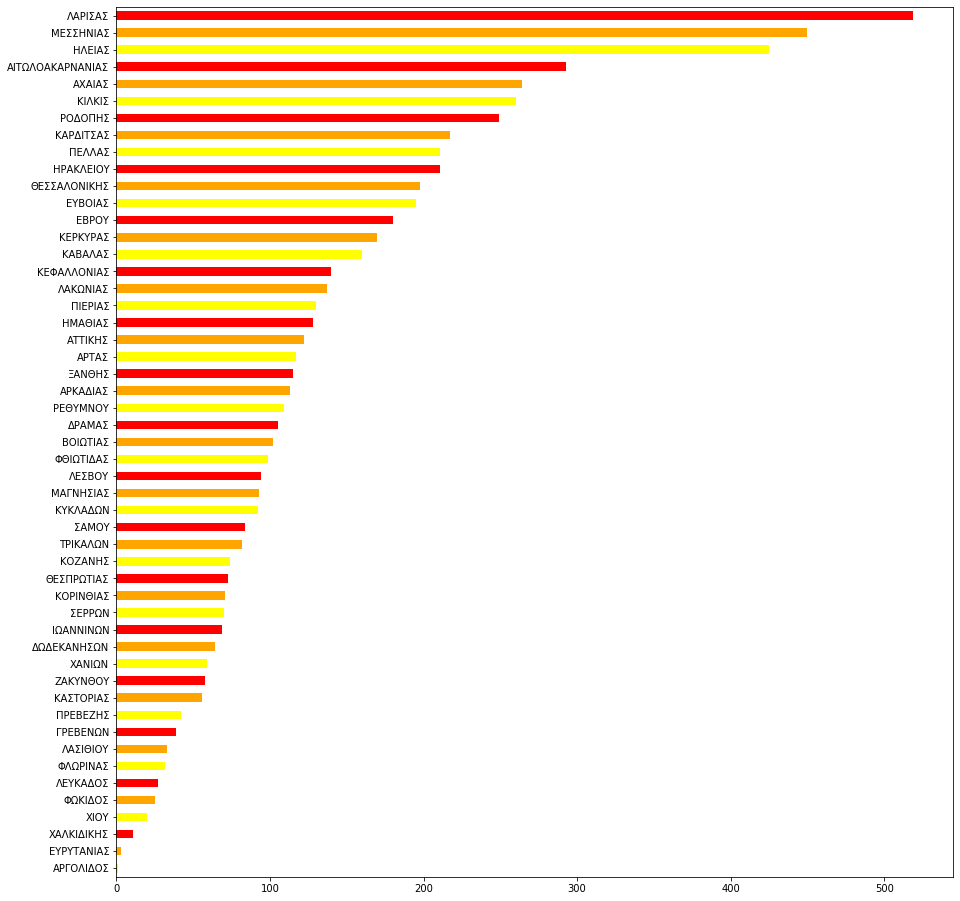

In [125]:
colors = ['yellow', 'orange', 'red']

df.region.value_counts().iloc[::-1].plot(kind='barh',figsize=(15,16), color=colors)

## Number of total firefight personnel used, per region

In [126]:
df.groupby('region').total_firefight_personnel.sum()

region
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ    1759
ΑΡΓΟΛΙΔΟΣ              0
ΑΡΚΑΔΙΑΣ             833
ΑΡΤΑΣ                629
ΑΤΤΙΚΗΣ             2703
ΑΧΑΙΑΣ              1415
ΒΟΙΩΤΙΑΣ             216
ΓΡΕΒΕΝΩΝ             296
ΔΡΑΜΑΣ               437
ΔΩΔΕΚΑΝΗΣΩΝ          724
ΕΒΡΟΥ               1094
ΕΥΒΟΙΑΣ             2526
ΕΥΡΥΤΑΝΙΑΣ            20
ΖΑΚΥΝΘΟΥ             377
ΗΛΕΙΑΣ              3110
ΗΜΑΘΙΑΣ              438
ΗΡΑΚΛΕΙΟΥ           1170
ΘΕΣΠΡΩΤΙΑΣ           338
ΘΕΣΣΑΛΟΝΙΚΗΣ        1271
ΙΩΑΝΝΙΝΩΝ            650
ΚΑΒΑΛΑΣ              304
ΚΑΡΔΙΤΣΑΣ            548
ΚΑΣΤΟΡΙΑΣ            362
ΚΕΡΚΥΡΑΣ            1022
ΚΕΦΑΛΛΟΝΙΑΣ          939
ΚΙΛΚΙΣ               937
ΚΟΖΑΝΗΣ              500
ΚΟΡΙΝΘΙΑΣ            859
ΚΥΚΛΑΔΩΝ             601
ΛΑΚΩΝΙΑΣ            1118
ΛΑΡΙΣΑΣ             1479
ΛΑΣΙΘΙΟΥ             250
ΛΕΣΒΟΥ               728
ΛΕΥΚΑΔΟΣ             165
ΜΑΓΝΗΣΙΑΣ            727
ΜΕΣΣΗΝΙΑΣ           2406
ΞΑΝΘΗΣ               537
ΠΕΛΛΑΣ               494
ΠΙΕΡΙΑΣ              449
ΠΡΕΒΕΖΗΣ          

## Top 5 fire incidents where large number of firefight personel was used!

In [127]:
df.sort_values(by ='total_firefight_personnel', ascending=False).head(5)

,Fire_department,region,borough,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
31,12ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΠΕΝΤΕΛΗΣ,2018-07-23 16:49:00,2018-09-10 09:04:00,48 days 16:15:00,48.666667,12500,792,84,0
6409,Π.Υ. ΧΑΛΚΙΔΑΣ,ΕΥΒΟΙΑΣ,Δ. ΔΙΡΦΥΩΝ - ΜΕΣΣΑΠΙΩΝ,2018-08-12 15:07:00,2018-08-21 20:38:00,9 days 05:31:00,9.208333,5800,599,118,12
6065,Π.Υ. ΣΥΚΙΩΝΟΣ - ΚΙΑΤΟΥ,ΚΟΡΙΝΘΙΑΣ,Δ. ΞΥΛΟΚΑΣΤΡΟΥ-ΕΥΡΩΣΤΙΝΗΣ,2018-07-23 17:20:00,2018-08-02 20:00:00,10 days 02:40:00,10.083333,10000,218,38,9
6881,Π.Υ. ΣΑΜΟΥ,ΣΑΜΟΥ,Δ. ΣΑΜΟΥ,2018-09-08 20:27:00,2018-09-14 22:00:00,6 days 01:33:00,6.041667,1450,210,51,7
4313,Π.Κ. ΘΕΡΜΟΥ,ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ,Δ. ΘΕΡΜΟΥ,2018-09-05 14:20:00,2018-09-08 21:00:00,3 days 06:40:00,3.250000,25,203,19,1


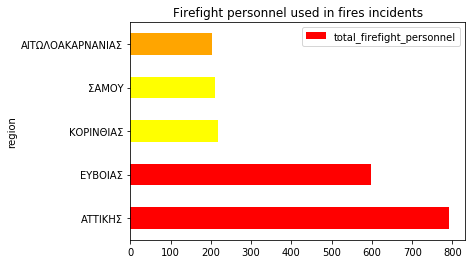

In [147]:
colors = ['red', 'red', 'yellow', 'yellow', 'orange']
df.sort_values(by ='total_firefight_personnel',ascending=False)[:5].plot(x='region', y='total_firefight_personnel', 
                                                                         
                                                                         
                        kind='barh', color=colors, title = 'Firefight personnel used in fires incidents')

## Number of total burned acres per region

In [148]:
df.groupby('region').total_burned_acres.sum()

region
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ      902
ΑΡΓΟΛΙΔΟΣ               2
ΑΡΚΑΔΙΑΣ              733
ΑΡΤΑΣ                 234
ΑΤΤΙΚΗΣ             65486
ΑΧΑΙΑΣ                483
ΒΟΙΩΤΙΑΣ             1392
ΓΡΕΒΕΝΩΝ              348
ΔΡΑΜΑΣ               1131
ΔΩΔΕΚΑΝΗΣΩΝ           308
ΕΒΡΟΥ                1071
ΕΥΒΟΙΑΣ              7614
ΕΥΡΥΤΑΝΙΑΣ              0
ΖΑΚΥΝΘΟΥ              553
ΗΛΕΙΑΣ               5226
ΗΜΑΘΙΑΣ               470
ΗΡΑΚΛΕΙΟΥ             787
ΘΕΣΠΡΩΤΙΑΣ            140
ΘΕΣΣΑΛΟΝΙΚΗΣ         3203
ΙΩΑΝΝΙΝΩΝ             335
ΚΑΒΑΛΑΣ               445
ΚΑΡΔΙΤΣΑΣ            1915
ΚΑΣΤΟΡΙΑΣ             940
ΚΕΡΚΥΡΑΣ              301
ΚΕΦΑΛΛΟΝΙΑΣ          1880
ΚΙΛΚΙΣ               6908
ΚΟΖΑΝΗΣ              1939
ΚΟΡΙΝΘΙΑΣ           10117
ΚΥΚΛΑΔΩΝ            10421
ΛΑΚΩΝΙΑΣ              981
ΛΑΡΙΣΑΣ             24079
ΛΑΣΙΘΙΟΥ              253
ΛΕΣΒΟΥ                251
ΛΕΥΚΑΔΟΣ               21
ΜΑΓΝΗΣΙΑΣ             772
ΜΕΣΣΗΝΙΑΣ            1106
ΞΑΝΘΗΣ               1566
ΠΕΛΛΑΣ                564
ΠΙΕΡΙ

## Top 5 cases with most acres burned 

In [158]:
df.sort_values(by ='total_burned_acres', ascending=False).head(10)

,Fire_department,region,borough,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
41,Π.Υ. ΜΕΓΑΡΩΝ,ΑΤΤΙΚΗΣ,Δ. ΜΕΓΑΡΕΩΝ,2018-07-23 12:03:00,2018-08-02 19:30:00,10 days 07:27:00,10.291667,50650,117,53,28
31,12ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΠΕΝΤΕΛΗΣ,2018-07-23 16:49:00,2018-09-10 09:04:00,48 days 16:15:00,48.666667,12500,792,84,0
6065,Π.Υ. ΣΥΚΙΩΝΟΣ - ΚΙΑΤΟΥ,ΚΟΡΙΝΘΙΑΣ,Δ. ΞΥΛΟΚΑΣΤΡΟΥ-ΕΥΡΩΣΤΙΝΗΣ,2018-07-23 17:20:00,2018-08-02 20:00:00,10 days 02:40:00,10.083333,10000,218,38,9
6409,Π.Υ. ΧΑΛΚΙΔΑΣ,ΕΥΒΟΙΑΣ,Δ. ΔΙΡΦΥΩΝ - ΜΕΣΣΑΠΙΩΝ,2018-08-12 15:07:00,2018-08-21 20:38:00,9 days 05:31:00,9.208333,5800,599,118,12
6605,Π.Κ. ΠΑΡΟΥ,ΚΥΚΛΑΔΩΝ,Δ. ΠΑΡΟΥ,2018-07-31 16:42:00,2018-08-09 07:50:00,8 days 15:08:00,8.625000,4000,79,17,4
3127,1ος Π.Σ. ΛΑΡΙΣΑΣ,ΛΑΡΙΣΑΣ,Δ. ΚΙΛΕΛΕΡ,2018-08-20 19:00:00,2018-08-21 01:00:00,0 days 06:00:00,0.250000,2500,4,2,0
6552,Π.Υ. ΕΡΜΟΥΠΟΛΗΣ,ΚΥΚΛΑΔΩΝ,Δ. ΣΕΡΙΦΟΥ,2018-04-26 10:22:00,2018-04-27 08:25:00,0 days 22:03:00,0.916667,2000,20,1,4
2889,Π.Κ. ΦΑΡΣΑΛΩΝ,ΛΑΡΙΣΑΣ,Δ. ΦΑΡΣΑΛΩΝ,2018-06-09 12:15:00,2018-06-09 20:00:00,0 days 07:45:00,0.291667,1650,8,5,0
3199,1ος Π.Σ. ΛΑΡΙΣΑΣ,ΛΑΡΙΣΑΣ,Δ. ΚΙΛΕΛΕΡ,2018-09-22 19:00:00,2018-09-23 01:10:00,0 days 06:10:00,0.250000,1550,4,2,0
7275,Π.Κ. ΚΑΝΤΑΝΟΥ,ΧΑΝΙΩΝ,Δ. ΠΛΑΤΑΝΙΑ,2018-07-23 18:50:00,2018-07-28 21:39:00,5 days 02:49:00,5.083333,1500,181,18,3


## Top 5 cases of terrestial forces needed 

In [45]:
df.sort_values(by ='total_terrestrial_forces', ascending=False).head(5) 

,Fire_department,region,borough,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
6409,Π.Υ. ΧΑΛΚΙΔΑΣ,ΕΥΒΟΙΑΣ,Δ. ΔΙΡΦΥΩΝ - ΜΕΣΣΑΠΙΩΝ,2018-08-12 15:07:00,2018-08-21 20:38:00,9 days 05:31:00,9.208333,5800,599,118,12
31,12ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΠΕΝΤΕΛΗΣ,2018-07-23 16:49:00,2018-09-10 09:04:00,48 days 16:15:00,48.666667,12500,792,84,0
6376,Π.Υ. ΧΑΛΚΙΔΑΣ,ΕΥΒΟΙΑΣ,Δ. ΔΙΡΦΥΩΝ - ΜΕΣΣΑΠΙΩΝ,2018-06-01 15:25:00,2018-06-10 18:50:00,9 days 03:25:00,9.125000,440,141,54,4
41,Π.Υ. ΜΕΓΑΡΩΝ,ΑΤΤΙΚΗΣ,Δ. ΜΕΓΑΡΕΩΝ,2018-07-23 12:03:00,2018-08-02 19:30:00,10 days 07:27:00,10.291667,50650,117,53,28
6881,Π.Υ. ΣΑΜΟΥ,ΣΑΜΟΥ,Δ. ΣΑΜΟΥ,2018-09-08 20:27:00,2018-09-14 22:00:00,6 days 01:33:00,6.041667,1450,210,51,7


## Top 5 cases of aerial forces needed 

In [46]:
df.sort_values(by ='total_aerial_forces', ascending=False).head(5) 

,Fire_department,region,borough,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
41,Π.Υ. ΜΕΓΑΡΩΝ,ΑΤΤΙΚΗΣ,Δ. ΜΕΓΑΡΕΩΝ,2018-07-23 12:03:00,2018-08-02 19:30:00,10 days 07:27:00,10.291667,50650,117,53,28
6409,Π.Υ. ΧΑΛΚΙΔΑΣ,ΕΥΒΟΙΑΣ,Δ. ΔΙΡΦΥΩΝ - ΜΕΣΣΑΠΙΩΝ,2018-08-12 15:07:00,2018-08-21 20:38:00,9 days 05:31:00,9.208333,5800,599,118,12
6065,Π.Υ. ΣΥΚΙΩΝΟΣ - ΚΙΑΤΟΥ,ΚΟΡΙΝΘΙΑΣ,Δ. ΞΥΛΟΚΑΣΤΡΟΥ-ΕΥΡΩΣΤΙΝΗΣ,2018-07-23 17:20:00,2018-08-02 20:00:00,10 days 02:40:00,10.083333,10000,218,38,9
5277,Π.Υ. ΚΑΛΑΜΑΤΑΣ,ΜΕΣΣΗΝΙΑΣ,Δ. ΚΑΛΑΜΑΤΑΣ,2018-09-08 17:10:00,2018-09-13 13:25:00,4 days 20:15:00,4.833333,60,62,25,9
6881,Π.Υ. ΣΑΜΟΥ,ΣΑΜΟΥ,Δ. ΣΑΜΟΥ,2018-09-08 20:27:00,2018-09-14 22:00:00,6 days 01:33:00,6.041667,1450,210,51,7


## Terrestial and aerial forces where used in top 5 cases of most acres burned (1) 

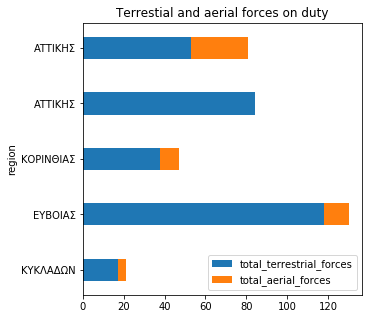

In [175]:
df.sort_values(by ='total_burned_acres', ascending=False).head(5)[::-1].plot(x='region', 
        y=['total_terrestrial_forces', 'total_aerial_forces'], 
        kind='barh', 
        stacked=True,
        figsize=(5,5),
        width=0.4,
        title="Terrestial and aerial forces on duty")

## Terrestial and aerial forces where used in top 5 cases of most acres burned (2) - Not Good

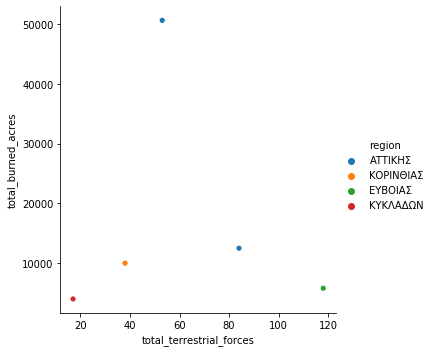

In [176]:
sns.relplot(data=df.sort_values(by ='total_burned_acres', ascending=False).head(5), 
            x='total_terrestrial_forces', y='total_burned_acres', hue='region')

## Terrestial and aerial forces where used in top 5 cases of most acres burned (3) 

[]

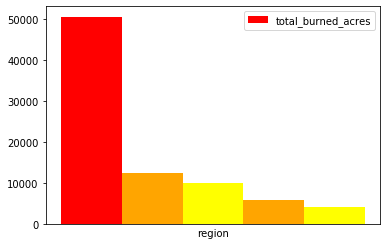

In [181]:
colors = ['red', 'orange', 'yellow', 'orange', 'yellow']

ax = df.sort_values(by ='total_burned_acres', ascending=False).head(5) \
    .plot(x='region', y='total_burned_acres', kind='bar', width=1, color=colors)

ax.set_xticks([])

## Top 5 worst cases in terms of wait days (Fail because of wrongful import of data by the source. e.g. 10/6/2018 and then 6/10/2018 

In [43]:
df.sort_values(by ='wait_days', ascending=False).head(5)

,Fire_department,region,borough,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
7317,Π.Υ. ΡΕΘΥΜΝΗΣ,ΡΕΘΥΜΝΟΥ,Δ. ΡΕΘΥΜΝΗΣ,2018-06-10 07:50:00,2018-10-06 10:55:00,118 days 03:05:00,118.125000,0,0,0,0
4063,Π.Υ. ΑΙΓΙΟΥ,ΑΧΑΙΑΣ,Δ. ΑΙΓΙΑΛΕΙΑΣ,2018-09-12 09:08:00,2018-12-13 10:33:00,92 days 01:25:00,92.041667,1,14,8,0
4064,Π.Υ. ΑΙΓΙΟΥ,ΑΧΑΙΑΣ,Δ. ΑΙΓΙΑΛΕΙΑΣ,2018-09-12 14:20:00,2018-12-13 10:33:00,91 days 20:13:00,91.833333,0,6,5,0
2740,Π.Κ. ΑΝΩ ΑΘΑΜΑΝΙΟΥ,ΑΡΤΑΣ,Δ. ΚΕΝΤΡΙΚΩΝ ΤΖΟΥΜΕΡΚΩΝ,2018-04-15 22:42:00,2018-07-15 23:40:00,91 days 00:58:00,91.000000,0,3,1,0
7875,Π.Κ. ΛΗΞΟΥΡΙΟΥ,ΚΕΦΑΛΛΟΝΙΑΣ,Δ. ΚΕΦΑΛΛΟΝΙΑΣ,2018-04-07 17:10:00,2018-07-04 20:00:00,88 days 02:50:00,88.083333,3,5,3,0
